# MBIT School

## Executive Master en Data Science (2020-2021)
 
by

*Nuria Espadas*  
*Mireia Vecino*  
*Tomeu Mir*  

## EDA

Exploratory data analysis, or **EDA**, is one of the first steps in the data science process. It involves learning as much as possible about the data.

It is a process of investigating the data in order to discover patterns, detect anomalies, test hypotheses and verify assumptions with the help of statistics and graphical representations.

In [1]:
import pandas as pd
import numpy as np
import math
import klib
import json
pd.options.mode.chained_assignment = None  # default='warn'

The first step is importing the libraries required

We start importing the csv, created from the ETL extraction as Panda. We sample the first and last 5 rows of our dataset.

In [2]:
DATA_PATH = '../data/'
df = pd.read_csv(DATA_PATH+'df_tfs_xa_plus_meteo.csv')
df.head(5)     

,Unnamed: 0,H_BO_HEADERID,H_BOOKINGDATE,H_STARTDATE,H_ENDDATE,H_DURATION,H_DAYSBEFOREBOOK,I_BO_ITEMID,I_BOOKINGDATE,I_STARTDATE,...,tmin,tmax,dir,velmedia,racha,sol,presMax,presMin,lat,lon
0,0,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,57811718,2018-10-05,2019-01-14,...,14.8,24.5,99.0,5.0,9.2,9.7,1013.5,1010.3,28.046991,-16.561157
1,1,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,57811786,2018-10-05,2019-01-22,...,14.7,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3,28.046991,-16.561157
2,2,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,59637648,2018-10-05,2019-01-22,...,14.7,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3,28.046991,-16.561157
3,3,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,59244068,2018-10-05,2019-01-16,...,9.4,16.1,11.0,3.9,8.9,5.7,952.5,948.7,28.477497,-16.329445
4,4,21788788,2018-10-05,2019-06-01,2019-01-27,21,241,57811620,2018-10-05,2019-01-16,...,15.1,22.8,99.0,7.8,12.8,9.8,1014.3,1010.3,28.046991,-16.561157


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             25429 non-null  int64  
 1   H_BO_HEADERID          25429 non-null  int64  
 2   H_BOOKINGDATE          25429 non-null  object 
 3   H_STARTDATE            25429 non-null  object 
 4   H_ENDDATE              25429 non-null  object 
 5   H_DURATION             25429 non-null  int64  
 6   H_DAYSBEFOREBOOK       25429 non-null  int64  
 7   I_BO_ITEMID            25429 non-null  int64  
 8   I_BOOKINGDATE          25429 non-null  object 
 9   I_STARTDATE            25429 non-null  object 
 10  I_ENDDATE              25429 non-null  object 
 11  I_DURATION             25429 non-null  int64  
 12  I_DAYSBEFOREBOOK       25429 non-null  int64  
 13  I_OD_RESORTOFFICEID    25429 non-null  int64  
 14  I_OD_STOCKID           25429 non-null  int64  
 15  GD

We observe that our dataset has a combination of **categorical** (object) and **numeric** (float and int) characteristics, as well as the number of values each of them has. There is variable has null/missing values.

With the previous knowledge we have of our features and having clear the final objective, to make a **excursion recommender**, I get rid of these features. 

In [4]:
cols_to_drop = ['Unnamed: 0'
,'H_BO_HEADERID'
,'H_BOOKINGDATE'
,'H_STARTDATE'
,'H_ENDDATE'
,'H_DURATION'
,'H_DAYSBEFOREBOOK'
,'I_DURATION'
,'I_BO_ITEMID'
,'I_ENDDATE'
,'I_OD_RESORTOFFICEID'
,'I_OD_STOCKID'
,'GD_STOCKTYPEGROUPCODE'
,'SERVICEUNITDESC'
,'SOURCE_MARKET'
,'SOURCE_COUNTRY_NAME'
,'I_LATITUD'
,'I_LONGITUD'
,'TR_NUM_OF_SERVICES'
,'TR_TOTAL_SALES'
,'XA_NUM_OF_SERVICES'
,'XA_TOTAL_SALES'
,'AC_NUM_OF_SERVICES'
,'AC_TOTAL_SALES'
,'AC_AVG_RATING'
,'indicativo'
,'fecha'
,'lat'
,'lon'
]
df.drop(cols_to_drop,axis=1, inplace=True)

This step is necessary in every EDA because we have many columns that do not provide us with information or the information they do provide us with is overflowing.

The format of following features, time and date, is changed in order to work better with them.

In [5]:
df['I_BOOKINGDATE'] = pd.to_datetime(df['I_BOOKINGDATE'])
df['I_STARTDATE'] = pd.to_datetime(df['I_STARTDATE'])
df['i_booking_dayofweek'] = df['I_BOOKINGDATE'].dt.dayofweek
df['i_start_dayofweek'] = df['I_STARTDATE'].dt.dayofweek

We create this column **i_avg_sales** with the average value for each of the bookings according to the number of people in them. This new feature will provide us with an easier to understand way to have the average amount for each row.

In [6]:
df['i_avg_sales'] = df['I_TOTAL_SALES_SC']/(df['ADT']+df['CHD']+df['INF'])

In [7]:
df.head(5)

,I_BOOKINGDATE,I_STARTDATE,I_DAYSBEFOREBOOK,STOCK_CODE,STOCK_NAME,I_TOTAL_SALES_SC,SOURCE_COUNTRY_CODE,ADT,CHD,INF,...,tmax,dir,velmedia,racha,sol,presMax,presMin,i_booking_dayofweek,i_start_dayofweek,i_avg_sales
0,2018-10-05,2019-01-14,249,XESTCIBSBI,Mts. Teide South,47,FI,2,0,0,...,24.5,99.0,5.0,9.2,9.7,1013.5,1010.3,4,0,23.5
1,2018-10-05,2019-01-22,257,PESTCI4KNA,Mts. La Gomera,110,FI,2,0,0,...,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3,4,1,55.0
2,2018-10-05,2019-01-22,257,LESTCI5XRO,Fred Olsen,0,FI,2,0,0,...,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3,4,1,0.0
3,2018-10-05,2019-01-16,251,LESTCI4FX8,Bodegas Alvaro,0,FI,2,0,0,...,16.1,11.0,3.9,8.9,5.7,952.5,948.7,4,2,0.0
4,2018-10-05,2019-01-16,251,XESTCIBUM4,Mts. La Laguna and Bodega,65,FI,2,0,0,...,22.8,99.0,7.8,12.8,9.8,1014.3,1010.3,4,2,32.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   I_BOOKINGDATE        25429 non-null  datetime64[ns]
 1   I_STARTDATE          25429 non-null  datetime64[ns]
 2   I_DAYSBEFOREBOOK     25429 non-null  int64         
 3   STOCK_CODE           25429 non-null  object        
 4   STOCK_NAME           25429 non-null  object        
 5   I_TOTAL_SALES_SC     25429 non-null  int64         
 6   SOURCE_COUNTRY_CODE  25428 non-null  object        
 7   ADT                  25429 non-null  int64         
 8   CHD                  25429 non-null  int64         
 9   INF                  25429 non-null  int64         
 10  AVG_ADT_AGE          14415 non-null  float64       
 11  LEAD_PAX_AGE         14517 non-null  float64       
 12  tmed                 25373 non-null  float64       
 13  prec                 25429 non-

## Columns description

### From the database of bookigns:
-  **I_BOOKINGDATE**: the date of the excursion booking.
-  **I_STARTDATE**: the date of the excursion.
-  **I_DAYSBEFOREBOOK**: the number of days from the bookings until the day of the excrusion.
-  **STOCK_CODE**: The excursion code (the target class).
-  **STOCK_NAME**: The excrusion title or name.
-  **I_TOTAL_SALES_SC**: The total cost of the excursion.
-  **SOURCE_COUNTRY_CODE**: The market country code.
-  **ADT**: The number of adults for the booking. A pax is considered adult after 6 years old.
-  **CHD**: The number of children. A pax is considered a children between 2 and 6 years. 
-  **INF**: The number of infants. A pax is considered an infant until having 2 years.
-  **AVG_ADT_AGE**: The average age of the adults of the booking
-  **LEAD_PAX_AGE**: The age of the lead pax. A lead pax is the person responsible of the booking.
-  **i_booking_dayofweek**: The weekday when the booking was done.
-  **i_start_dayofweek**: The weeksday when the excursion was done.
-  **i_avg_sales**: The average cost per pax (total paxes = ADT+CHD+INF)

### From the AEMET open data
https://opendata.aemet.es/  
All the following metrics refer to meteo data for the day that the excursion was done.

-  **tmed**: The average temperature in Celsius.
-  **prec**: Daily raining in mm.
-  **tmin**: The minimum temperature in Celsius. 
-  **tmax**: The maximum temperature in Celsius.
-  **dir**: Direction of maximum streak in tens of degrees. 
-  **velmedia**: Average wind speed in meter/sec.
-  **racha**: Maximum wind speed in m/s.
-  **sol**: Insolation in hours.
-  **presMax**: Maximum pressure at station reference level in hPa.
-  **presMin**: Minumum pressure at station reference level in hPa.

In [9]:
# for viewing a detailed description of the API response, uncomment the following line and execute this cell
# %load ../data/aemet_metadata_valores_climatologicos_diarios.json

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
I_DAYSBEFOREBOOK,25429.0,5.865469,22.023339,-1.0,1.0,2.0,4.0,443.0
I_TOTAL_SALES_SC,25429.0,101.101144,71.387998,-183.0,62.0,98.0,128.0,1920.0
ADT,25429.0,2.246883,1.335731,0.0,2.0,2.0,2.0,42.0
CHD,25429.0,0.306422,0.671868,0.0,0.0,0.0,0.0,9.0
INF,25429.0,0.026938,0.183535,0.0,0.0,0.0,0.0,5.0
AVG_ADT_AGE,14415.0,43.482345,16.247405,9.0,30.0,41.0,56.0,99.0
LEAD_PAX_AGE,14517.0,44.878418,16.904185,2.0,30.0,46.0,57.0,99.0
tmed,25373.0,21.576676,2.824651,11.7,19.2,21.8,23.8,30.4
prec,25429.0,0.172677,1.401789,0.0,0.0,0.0,0.0,42.8
tmin,25373.0,17.663351,2.830238,7.4,15.5,17.9,19.9,25.7


We can see for each numeric feature, the count of values in it, the mean value, std or standard deviation, minimum value, the 25th percentile, the 50th percentile or median, the 75th percentile, and the maximum value. 

From the count we can also identify the features with missing values; their count is not equal to the total number of rows of the dataset. Missing values for variables related to age **(AVG_ADT_AGE, LEAD_PAX_AGE)** and climate **(tmed, prec, tmin, tmax,...)**

There is a large difference between the 75th percentile and the maximum values of the predictors **i_avg_sales**, **AVG_ADT_AGE**, **prec** , **I_TOTAL_SALES_SC** and **I_DAYSBEFOREBOOK**, indicating the existence of outlier in our dataset.

In [11]:
df.select_dtypes(include=['datetime64[ns]']).astype('datetime64[ns]').describe(datetime_is_numeric=True).transpose()

,count,mean,min,25%,50%,75%,max
I_BOOKINGDATE,25429,2019-07-08 04:59:47.400212224,2018-01-09,2019-04-15,2019-07-19,2019-09-26,2019-12-31
I_STARTDATE,25429,2019-07-15 19:47:02.494002944,2019-01-01,2019-04-26,2019-07-25,2019-10-07,2019-12-31


The statistical values for the dates do not add much to this statistical test.  What we do see is that 50% of the bookings are made in the first 7 months of the year.

In [12]:
df.select_dtypes(include=['object']).astype('object').describe().transpose()

,count,unique,top,freq
STOCK_CODE,25429,155,XESTCIB2T2,3205
STOCK_NAME,25429,154,Siam Park,3219
SOURCE_COUNTRY_CODE,25428,12,GB,17287


In the analysis we can see which is the most used, **STOCK_CODE**, the most chosen excursion, Siam Park, **STOCK_NAME** and the majority nationality ,**SOURCE_COUNTRY_CODE** of the people who go on these excursions, British.

# Distribution of the target class
 
The feature, **STOCK_CODE**, which is what we want to predict, has a catalogue of 155 different types of excursions.
 

 
We start the exploration with the **top 50** excursion types, with all the dataset

Text(0, 0.5, 'Total of samples')

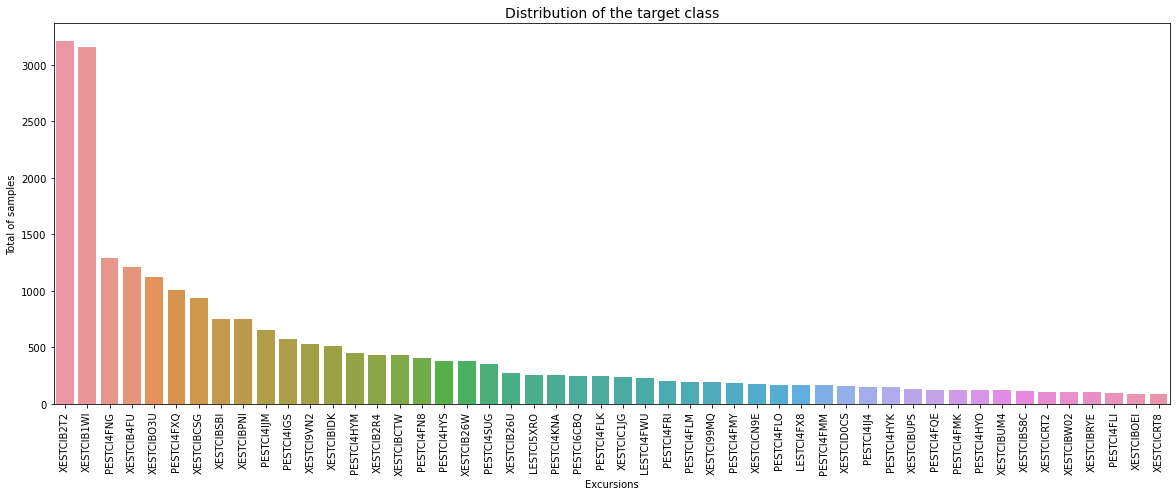

In [13]:
top = 50

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
chart = sns.countplot(x="STOCK_CODE",data=df, order = df['STOCK_CODE'].value_counts()[:top].index)
plt.title('Distribution of the target class', fontsize=14)
plt.xlabel('Excursions', fontsize=10)
plt.ylabel('Total of samples', fontsize=10)

Histogram ordered according to the quantity of each of the classes of the feature **STOCK_CODE**.  When the graphical representation of this feature is made, with respect to the total stocks of the dataset, it can be seen that there are 2 excursions that clearly stand out above the rest

In [14]:
pd.DataFrame( df.groupby(['STOCK_NAME']).size().sort_values(ascending=False).head(50) )

,0
STOCK_NAME,
Siam Park,3219
Loro Park,3205
Royal Delfin,1286
Teide National Park,1207
Loro Express Exclusive,1119
Mts. Inselrundfahrt - Tour de Ile,1008
Teide Masca (Grand Tour),934
Freebird (3H Vip Exclusive),747
Mts. Teide South,747


We can see numerically what we have already seen in the histogram. The most popular excursions with "Siam Park" and "Loro Park".

We have to reduce the number of the most demanded excursions.

We start the exploration with the **top 25** excursion types

We create a new dataset, **df_top** to do this exploration with the most demanded excursions.
To avoid the effect of the most requested excursions, **Siam Park** and **Loro Park**, we discarded them for this dataset. If we did not do so, any results we obtained would be biased and influenced by these excursions, and our model would not learn correctly.
From a business point of view, these 2 excursions, arguably sell themselves, we are interested in recommending other excursions, not the most popular ones.

In [15]:
top_xa = pd.DataFrame( df.groupby(['STOCK_CODE']).size().sort_values(ascending=False).head(30) )
top_xa = top_xa.iloc[2:(2+25)]
print(top_xa)

               0
STOCK_CODE      
PESTCI4FNG  1286
XESTCIB4FU  1207
XESTCIBO3U  1119
PESTCI4FXQ  1008
XESTCIBCSG   934
XESTCIBPNI   747
XESTCIBSBI   747
PESTCI4IJM   657
PESTCI4IGS   576
XESTCI9VN2   530
XESTCIBIDK   514
PESTCI4HYM   453
XESTCIB2R4   435
XESTCIBCTW   433
PESTCI4FN8   406
PESTCI4HYS   379
XESTCIB26W   376
PESTCI4SUG   352
XESTCIB26U   269
LESTCI5XRO   253
PESTCI4KNA   251
PESTCI6CBQ   245
PESTCI4FLK   243
XESTCIC1JG   240
LESTCI4FWU   231


In [16]:
top_xa.index

Index(['PESTCI4FNG', 'XESTCIB4FU', 'XESTCIBO3U', 'PESTCI4FXQ', 'XESTCIBCSG',
       'XESTCIBPNI', 'XESTCIBSBI', 'PESTCI4IJM', 'PESTCI4IGS', 'XESTCI9VN2',
       'XESTCIBIDK', 'PESTCI4HYM', 'XESTCIB2R4', 'XESTCIBCTW', 'PESTCI4FN8',
       'PESTCI4HYS', 'XESTCIB26W', 'PESTCI4SUG', 'XESTCIB26U', 'LESTCI5XRO',
       'PESTCI4KNA', 'PESTCI6CBQ', 'PESTCI4FLK', 'XESTCIC1JG', 'LESTCI4FWU'],
      dtype='object', name='STOCK_CODE')

In [17]:
df_top = df[df['STOCK_CODE'].isin(top_xa.index)]
df_top

,I_BOOKINGDATE,I_STARTDATE,I_DAYSBEFOREBOOK,STOCK_CODE,STOCK_NAME,I_TOTAL_SALES_SC,SOURCE_COUNTRY_CODE,ADT,CHD,INF,...,tmax,dir,velmedia,racha,sol,presMax,presMin,i_booking_dayofweek,i_start_dayofweek,i_avg_sales
0,2018-10-05,2019-01-14,249,XESTCIBSBI,Mts. Teide South,47,FI,2,0,0,...,24.5,99.0,5.0,9.2,9.7,1013.5,1010.3,4,0,23.500000
1,2018-10-05,2019-01-22,257,PESTCI4KNA,Mts. La Gomera,110,FI,2,0,0,...,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3,4,1,55.000000
2,2018-10-05,2019-01-22,257,LESTCI5XRO,Fred Olsen,0,FI,2,0,0,...,21.8,99.0,7.2,15.0,4.0,1016.8,1014.3,4,1,0.000000
5,2018-12-30,2019-02-01,3,LESTCI5XRO,Fred Olsen,0,FI,2,2,0,...,19.3,99.0,3.3,10.3,0.0,1013.2,1010.3,6,4,0.000000
6,2018-12-30,2019-02-01,2,PESTCI4KNA,Mts. La Gomera,164,FI,2,2,0,...,19.3,99.0,3.3,10.3,0.0,1013.2,1010.3,6,4,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25418,2019-12-30,2019-12-30,0,PESTCI4FNG,Royal Delfin,165,GB,2,2,0,...,27.2,6.0,5.8,11.7,9.6,1016.0,1012.6,0,0,41.250000
25421,2019-12-30,2019-12-30,0,PESTCI4FNG,Royal Delfin,60,NL,2,1,0,...,27.2,6.0,5.8,11.7,9.6,1016.0,1012.6,0,0,20.000000
25422,2019-12-31,2019-12-31,0,PESTCI4HYS,Gomera Safari Tour,250,GB,2,1,0,...,23.1,99.0,5.0,12.5,9.9,1017.2,1014.7,1,1,83.333333
25423,2019-12-29,2019-12-29,0,XESTCIB4FU,Teide National Park,78,GB,4,0,0,...,25.9,18.0,3.1,5.8,NaN,1009.2,1005.3,6,6,19.500000


In [18]:
cols = df_top.select_dtypes(include=[np.float64]).columns
df_top[cols] = df_top[cols].astype(np.float32)
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13891 entries, 0 to 25424
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   I_BOOKINGDATE        13891 non-null  datetime64[ns]
 1   I_STARTDATE          13891 non-null  datetime64[ns]
 2   I_DAYSBEFOREBOOK     13891 non-null  int64         
 3   STOCK_CODE           13891 non-null  object        
 4   STOCK_NAME           13891 non-null  object        
 5   I_TOTAL_SALES_SC     13891 non-null  int64         
 6   SOURCE_COUNTRY_CODE  13891 non-null  object        
 7   ADT                  13891 non-null  int64         
 8   CHD                  13891 non-null  int64         
 9   INF                  13891 non-null  int64         
 10  AVG_ADT_AGE          8258 non-null   float32       
 11  LEAD_PAX_AGE         8256 non-null   float32       
 12  tmed                 13855 non-null  float32       
 13  prec                 13891 non-

Text(0, 0.5, 'Total of samples')

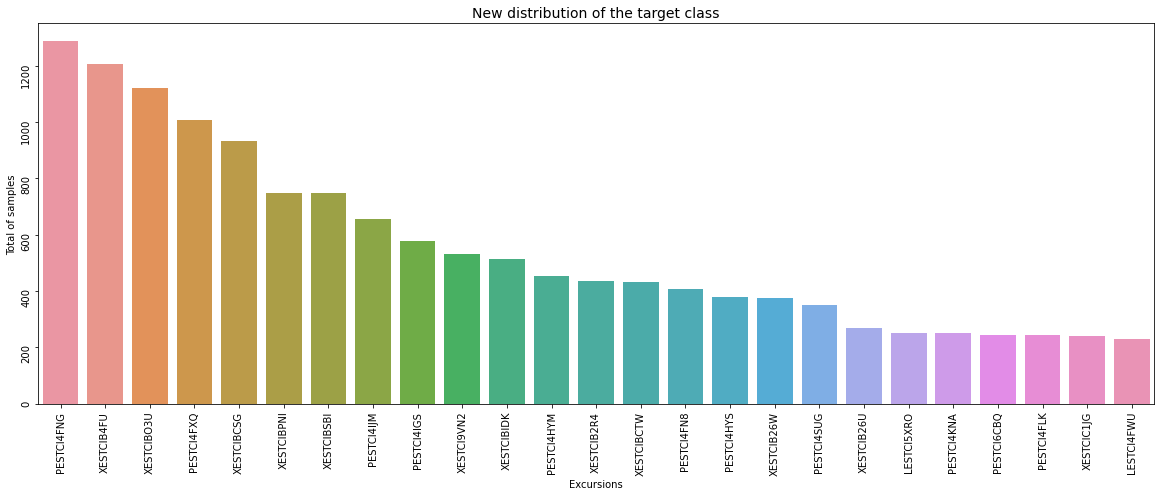

In [19]:
plt.figure(figsize=(20,7))
chart = sns.countplot(x="STOCK_CODE", data=df_top, order = df_top['STOCK_CODE'].value_counts()[:top].index)
chart.tick_params(rotation=90)
plt.title('New distribution of the target class', fontsize=14)
plt.xlabel('Excursions', fontsize=10)
plt.ylabel('Total of samples', fontsize=10)

Histogram ordered according to the number of bookings for each of the **STOCK_CODE**, in which we can see that the dispersion has decreased with respect to the **df_top**.

In [20]:
df_ranking = pd.DataFrame( df_top.groupby(['STOCK_CODE','STOCK_NAME']).size().sort_values(ascending=False).head(30),
                           columns=['total']
                         )
df_ranking.reset_index(inplace=True)
#df_ranking.reset_index(level=1, inplace=True)
df_ranking

,STOCK_CODE,STOCK_NAME,total
0,PESTCI4FNG,Royal Delfin,1286
1,XESTCIB4FU,Teide National Park,1207
2,XESTCIBO3U,Loro Express Exclusive,1119
3,PESTCI4FXQ,Mts. Inselrundfahrt - Tour de Ile,1008
4,XESTCIBCSG,Teide Masca (Grand Tour),934
5,XESTCIBPNI,Freebird (3H Vip Exclusive),747
6,XESTCIBSBI,Mts. Teide South,747
7,PESTCI4IJM,Twin Tickets,657
8,PESTCI4IGS,Teleferico / Cable Car,576
9,XESTCI9VN2,Teide By Night And Romantic Tour Only For Adults,530


We create a new dataset **df_ranking** to know to which **STOCK_NAME** each of the ** STOCK_CODE** and the number of excursions sold belong. 

# MISSING VALUES

We will identify the NA for all the features.

In [21]:
df_top.isna().sum()

I_BOOKINGDATE             0
I_STARTDATE               0
I_DAYSBEFOREBOOK          0
STOCK_CODE                0
STOCK_NAME                0
I_TOTAL_SALES_SC          0
SOURCE_COUNTRY_CODE       0
ADT                       0
CHD                       0
INF                       0
AVG_ADT_AGE            5633
LEAD_PAX_AGE           5635
tmed                     36
prec                      0
tmin                     36
tmax                     36
dir                     215
velmedia                103
racha                   215
sol                    3126
presMax                 215
presMin                 215
i_booking_dayofweek       0
i_start_dayofweek         0
i_avg_sales               0
dtype: int64

We find that we have 11 features with NA's. We will use a visualisation tool, with which we will quickly see the incidence of missing values within our dataset.

GridSpec(6, 6)

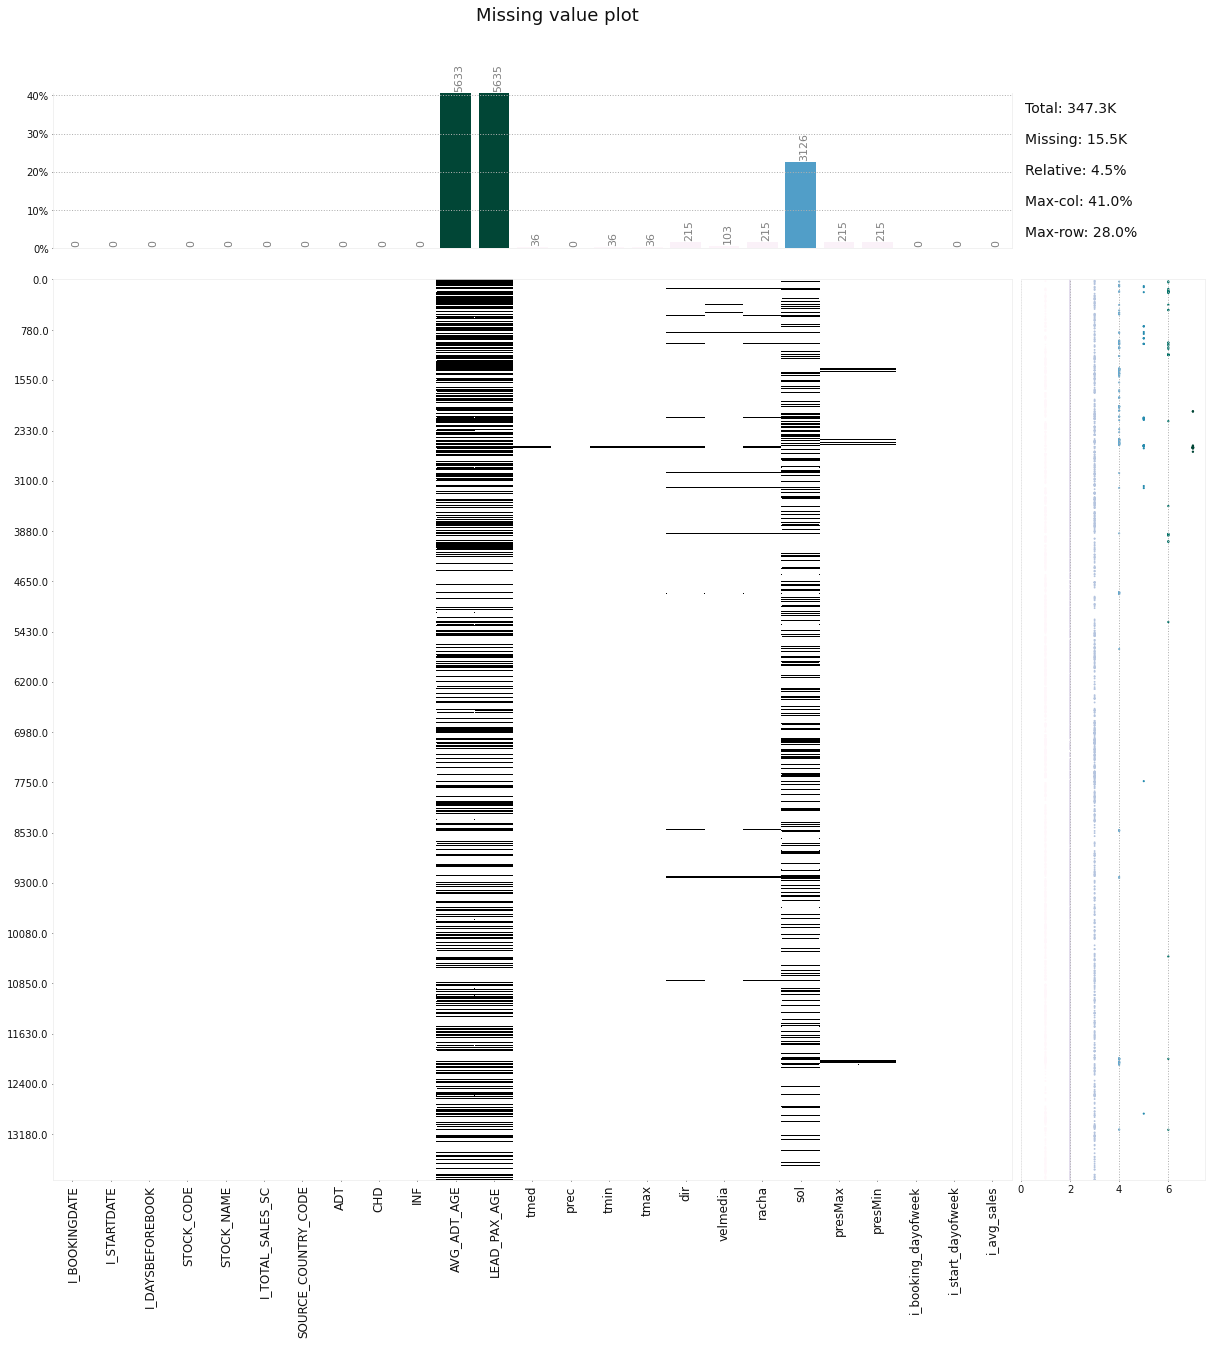

In [22]:
klib.missingval_plot(df_top)

There are 2 features, **AVG_ADT_AGE**, **LEAD_PAX_AGE** with more than 40% of NA, spread over the whole dataset. The rest of the features with NA's correspond to weather related features. 

## Processing of nulls

We have 2 types of features with missing values, we will treat each type with a type of replacement method.

We start with the method of replacement by the mean of the dataset, for those feaures where I have more than 40% of NA's.

In [23]:
df_top['AVG_ADT_AGE'].fillna(df_top['AVG_ADT_AGE'].mean(), inplace = True)
df_top['LEAD_PAX_AGE'].fillna(df_top['LEAD_PAX_AGE'].mean(), inplace = True)
df_top.isna().sum()

I_BOOKINGDATE             0
I_STARTDATE               0
I_DAYSBEFOREBOOK          0
STOCK_CODE                0
STOCK_NAME                0
I_TOTAL_SALES_SC          0
SOURCE_COUNTRY_CODE       0
ADT                       0
CHD                       0
INF                       0
AVG_ADT_AGE               0
LEAD_PAX_AGE              0
tmed                     36
prec                      0
tmin                     36
tmax                     36
dir                     215
velmedia                103
racha                   215
sol                    3126
presMax                 215
presMin                 215
i_booking_dayofweek       0
i_start_dayofweek         0
i_avg_sales               0
dtype: int64

For the replacement of the climatological data, we sort the data by **I_STARTDATE** and use the value of the closest previous row. 
We have decided to use this method, since the weather does not change radically from one day to the next.

In [24]:
df_top.sort_values(by='I_STARTDATE',axis=0, ascending=True, inplace=True)
df_top.fillna(method='ffill', inplace=True)
df_top.isna().sum()

I_BOOKINGDATE          0
I_STARTDATE            0
I_DAYSBEFOREBOOK       0
STOCK_CODE             0
STOCK_NAME             0
I_TOTAL_SALES_SC       0
SOURCE_COUNTRY_CODE    0
ADT                    0
CHD                    0
INF                    0
AVG_ADT_AGE            0
LEAD_PAX_AGE           0
tmed                   0
prec                   0
tmin                   0
tmax                   0
dir                    0
velmedia               0
racha                  0
sol                    0
presMax                0
presMin                0
i_booking_dayofweek    0
i_start_dayofweek      0
i_avg_sales            0
dtype: int64

In [25]:
df_top.head(5)

,I_BOOKINGDATE,I_STARTDATE,I_DAYSBEFOREBOOK,STOCK_CODE,STOCK_NAME,I_TOTAL_SALES_SC,SOURCE_COUNTRY_CODE,ADT,CHD,INF,...,tmax,dir,velmedia,racha,sol,presMax,presMin,i_booking_dayofweek,i_start_dayofweek,i_avg_sales
238,2018-12-29,2019-01-01,3,XESTCIB26W,San Miguel Castle,86,FI,1,1,0,...,23.299999,3.0,4.4,8.9,9.6,1018.299988,1013.000000,5,1,43.0
615,2019-01-01,2019-01-01,0,PESTCI4HYS,Gomera Safari Tour,184,NL,2,0,0,...,23.299999,3.0,4.4,8.9,9.6,1018.299988,1013.000000,1,1,92.0
617,2019-01-01,2019-01-01,0,XESTCIB4FU,Teide National Park,52,NL,2,0,0,...,22.600000,3.0,4.4,8.9,9.6,1013.700012,1008.400024,1,1,26.0
1550,2019-01-31,2019-01-02,1,XESTCIBCSG,Teide Masca (Grand Tour),72,GB,2,0,0,...,19.299999,99.0,3.3,10.3,0.0,1013.200012,1010.299988,3,2,36.0
1474,2019-01-29,2019-01-02,2,PESTCI4FXQ,Mts. Inselrundfahrt - Tour de Ile,108,LU,2,0,0,...,21.700001,8.0,8.1,16.1,8.5,1016.700012,1013.599976,1,2,54.0


We already have the dataset are missing values

# Outliers

  
**TOTAL SALES and NUMBER OF PAXES**

Total sales and number of paxes may be related, as higher is the number of people in an excursion, higher should be the cost.

Text(0, 0.5, 'Count')

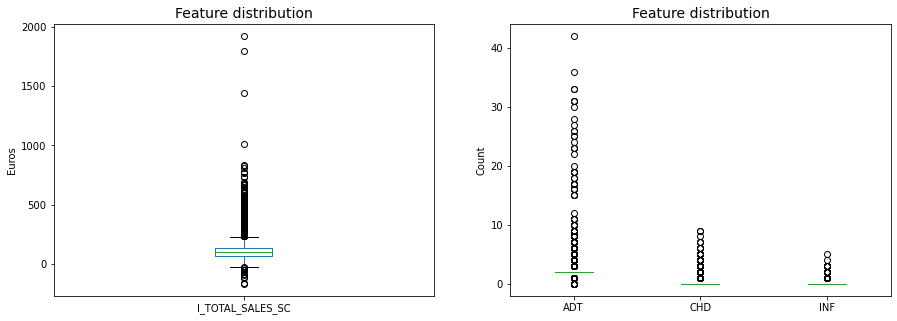

In [26]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax = df_top[['I_TOTAL_SALES_SC']].plot.box(ax = axes[0])
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("Euros")
ax2=df_top[['ADT','CHD','INF']].plot.box(ax = axes[1]) 
ax2.set_title('Feature distribution', fontsize=14)
ax2.set_ylabel("Count")


In [27]:
df_top[['I_TOTAL_SALES_SC','ADT','CHD','INF']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
I_TOTAL_SALES_SC,13891.0,109.005687,70.511512,-165.0,69.0,103.0,134.0,1920.0
ADT,13891.0,2.252322,1.405804,0.0,2.0,2.0,2.0,42.0
CHD,13891.0,0.267583,0.640958,0.0,0.0,0.0,0.0,9.0
INF,13891.0,0.023684,0.177010,0.0,0.0,0.0,0.0,5.0


**I_TOTAL_SALES_SC**, we have values that are far away from the average, which makes me think that we have group bookings.  We are going to opt for bookings of less than 8 people. We also see that we have negative amounts

For the features **ADT**, **CHD**, **INF** you can see the vast majority of bookings are only with **ADT** and an average age of 42 years. In the case of **CHD**, **INF**, there are few bookings and the average age is 9 and 5 respectively.

We check that **'I_TOTAL_SALES_SC** are below 0, in order to detect negatives.

In [28]:
df_top.query('I_TOTAL_SALES_SC < 0').sort_values(by='STOCK_CODE',ascending=True).count()

I_BOOKINGDATE          21
I_STARTDATE            21
I_DAYSBEFOREBOOK       21
STOCK_CODE             21
STOCK_NAME             21
I_TOTAL_SALES_SC       21
SOURCE_COUNTRY_CODE    21
ADT                    21
CHD                    21
INF                    21
AVG_ADT_AGE            21
LEAD_PAX_AGE           21
tmed                   21
prec                   21
tmin                   21
tmax                   21
dir                    21
velmedia               21
racha                  21
sol                    21
presMax                21
presMin                21
i_booking_dayofweek    21
i_start_dayofweek      21
i_avg_sales            21
dtype: int64

**AGES**

Text(0, 0.5, 'Age')

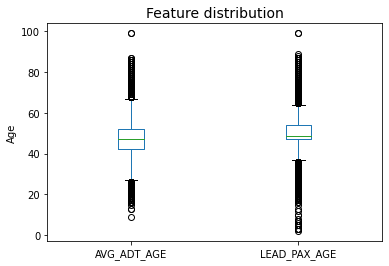

In [29]:
ax = df_top[['AVG_ADT_AGE','LEAD_PAX_AGE']].plot.box()
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("Age")

In [30]:
df_top[['AVG_ADT_AGE','LEAD_PAX_AGE']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AVG_ADT_AGE,13891.0,47.223743,12.503433,9.0,42.0,47.222450,52.0,99.0
LEAD_PAX_AGE,13891.0,48.794769,12.562797,2.0,47.0,48.794693,54.0,99.0


It can be seen that there is a very similar average for both characteristics as for the rest of the statistics, so before making a decision on these characteristics we will have to see the correlation of both. 

We can also see that there are several outliers in the tails of the Q1 and Q3 boxplot for both features.

It can be seen that people under 18 and over 80 are not decision makers when it comes to making a booking, as we have seen, bookings are made by people who are on average 47 years old. So we could dispense with the under 18s and over 80s for your model, you could also fill them in with the or, remove the rows from the dataset.

**BOOKING vs START dayweek**

Text(0, 0.5, 'Weekday')

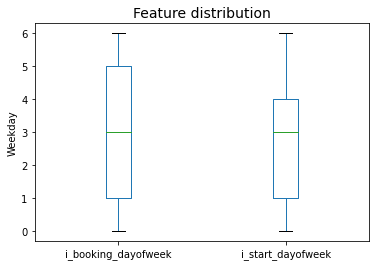

In [31]:
ax=df_top[['i_booking_dayofweek','i_start_dayofweek']].plot.box()
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("Weekday")

In [32]:
df_top[['i_booking_dayofweek','i_start_dayofweek']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
i_booking_dayofweek,13891.0,2.806205,2.102217,0.0,1.0,3.0,5.0,6.0
i_start_dayofweek,13891.0,2.758909,1.895499,0.0,1.0,3.0,4.0,6.0


In these boxplots it can be seen that they follow a very close to normal distribution, in the case of the **i_booking_dayofweek** featrure the mean and median are very close, the tails of Q1 and Q2. The vast majority of bookings are made from Monday to Friday.
For **i_start_dayofweek**, the distribution is not as normalised as the previous one, the mean almost coincides with the median, but you can see that the tail of Q3 has a higher weight than in the previous feature. 
As a conclusion we can see that most of the excursions are made between Mondays and Thursdays.

**METEO: Temperatures**

Text(0, 0.5, 'Celsius')

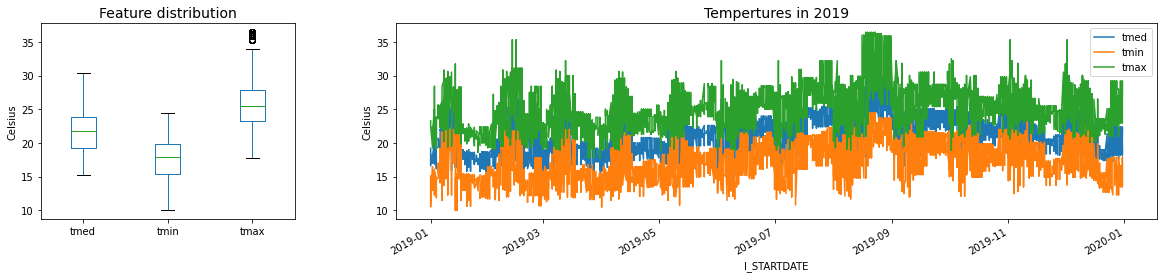

In [33]:
df_top.set_index('I_STARTDATE')
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,4),gridspec_kw={'width_ratios': [1, 3]})
ax=df_top[['tmed','tmin','tmax']].plot.box(ax = axes[0])
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("Celsius")
ax2=df_top.plot.line(x='I_STARTDATE',y=['tmed','tmin','tmax'],ax = axes[1])
ax2.set_title('Tempertures in 2019', fontsize=14)
ax2.set_ylabel("Celsius")

In [34]:
df_top[['tmin','tmed','tmax']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tmin,13891.0,17.716475,2.786770,10.000000,15.450000,17.900000,19.900000,24.500000
tmed,13891.0,21.638033,2.759381,15.300000,19.299999,21.799999,23.799999,30.400000
tmax,13891.0,25.556231,3.042082,17.799999,23.200001,25.500000,27.799999,36.400002


Text(0, 0.5, 'Density')

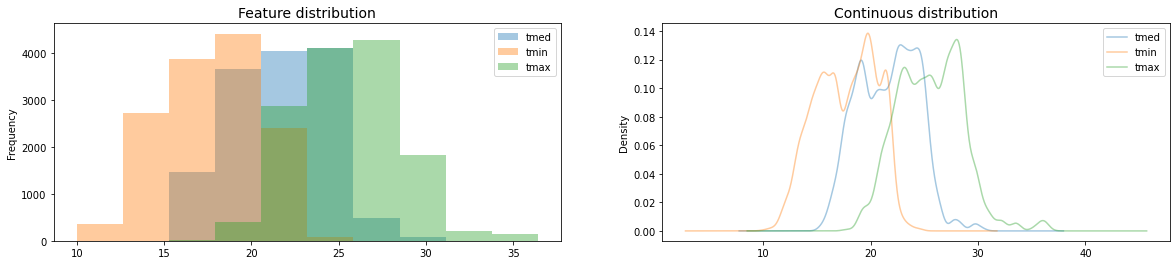

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
ax=df_top[['tmed','tmin','tmax']].plot.hist(ax = axes[0],alpha=0.4)
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("Frequency")
ax2=df_top[['tmed','tmin','tmax']].plot.density(ax = axes[1],alpha=0.4)
ax2.set_title('Continuous distribution', fontsize=14)
ax2.set_ylabel("Density")

In these graphs and statistics, it can be seen that the average thermal amplitude is 8 degrees. So it can be said that the 3 features represented here do not have big differences between them. 
The only thing that stands out are the outliers, in the maximum temperatures that reach 36º. 
With the reflected amplitude of these 3 features it can be indicated that the temperatures should not affect the excursions.
With the correlation matrix, we will assess the possibility of being left with one of these 3 attributes

**METEO: prec**

Text(0, 0.5, 'mm')

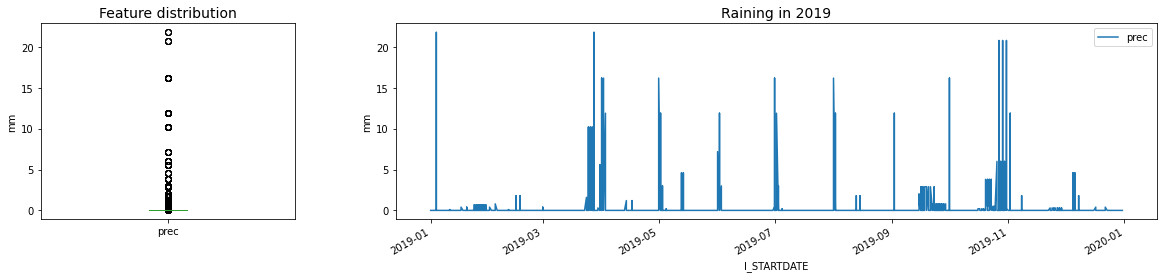

In [36]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,4),gridspec_kw={'width_ratios': [1, 3]})
ax=df_top['prec'].plot.box(ax = axes[0])
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("mm")
ax2=df_top.plot.line(x='I_STARTDATE',y=['prec'],ax = axes[1])
ax2.set_title('Raining in 2019', fontsize=14)
ax2.set_ylabel("mm")

In [37]:
df_top[['prec']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
prec,13891.0,0.18427,1.373796,0.0,0.0,0.0,0.0,21.799999


In [38]:
n=np.arange(0.0, 2.0, 0.2)
n

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])

Text(0, 0.5, 'Density')

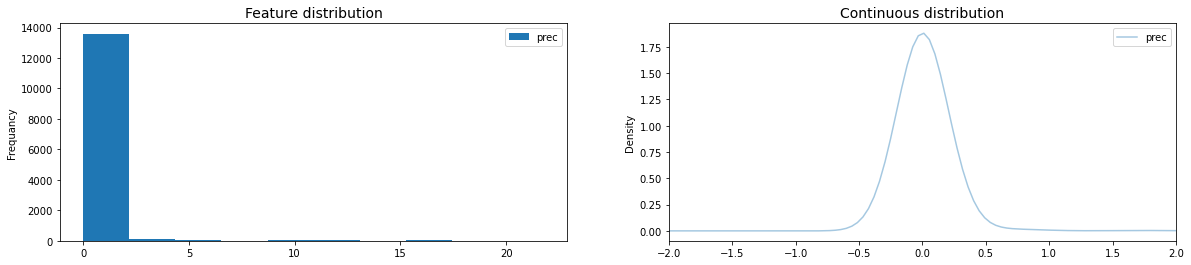

In [39]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
ax=df_top[['prec']].plot.hist(ax = axes[0])
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("Frequancy")
ax2=df_top[['prec']].plot.density(ax = axes[1],alpha=0.4,xlim=(-2,2))
ax2.set_title('Continuous distribution', fontsize=14)
ax2.set_ylabel("Density")

In the bar chart we see the distribution of rainfall recorded per day over the year in Tenerife. In the box-plot we can see that both the mean and the median are close to 0, when the maximum is 21,79. This is what causes us to have outliers, large precipitations. The most normal thing is that there is no rainfall in Tenerife, but there are days when there can be heavy rainfall.

**METEO: dir**

Text(0, 0.5, 'Tens of degrees')

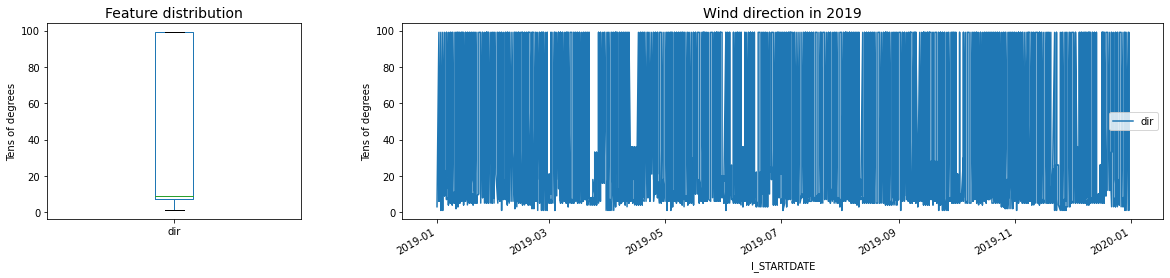

In [40]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,4),gridspec_kw={'width_ratios': [1, 3]})
ax=df_top['dir'].plot.box(ax = axes[0])
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("Tens of degrees")
ax2=df_top.plot.line(x='I_STARTDATE',y=['dir'],ax = axes[1])
ax2.set_title('Wind direction in 2019', fontsize=14)
ax2.set_ylabel("Tens of degrees")

We should recheck the meaning of this feature and will probably not be used in our final dataset.

**METEO: wind speed and max. speed**

Text(0, 0.5, 'meter per second')

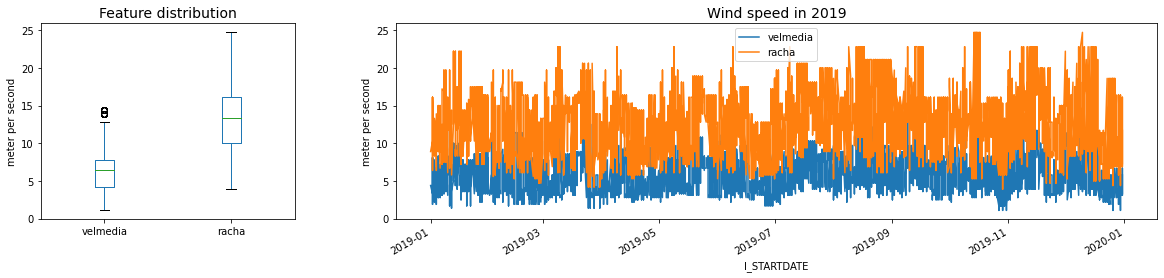

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,4),gridspec_kw={'width_ratios': [1, 3]})
ax=df_top[['velmedia','racha']].plot.box(ax = axes[0])
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("meter per second")
ax2=df_top.plot.line(x='I_STARTDATE',y=['velmedia','racha'],ax = axes[1])
ax2.set_title('Wind speed in 2019', fontsize=14)
ax2.set_ylabel("meter per second")

The results of these features do not indicate anything out of the ordinary, the data that are outside the boxplot beards are logical for this feature.

**METEO: Sun**

Text(0, 0.5, 'hours')

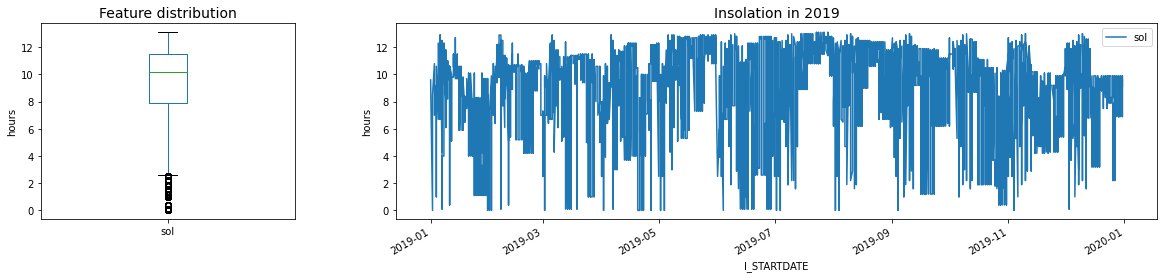

In [42]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,4),gridspec_kw={'width_ratios': [1, 3]})
ax=df_top[['sol']].plot.box(ax = axes[0])
ax.set_title('Feature distribution', fontsize=14)
ax.set_ylabel("hours")
ax2=df_top.plot.line(x='I_STARTDATE',y=['sol'],ax = axes[1])
ax2.set_title('Insolation in 2019', fontsize=14)
ax2.set_ylabel("hours")

In [43]:
df_top[['sol']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sol,13891.0,9.230031,3.174344,0.0,7.9,10.2,11.5,13.1


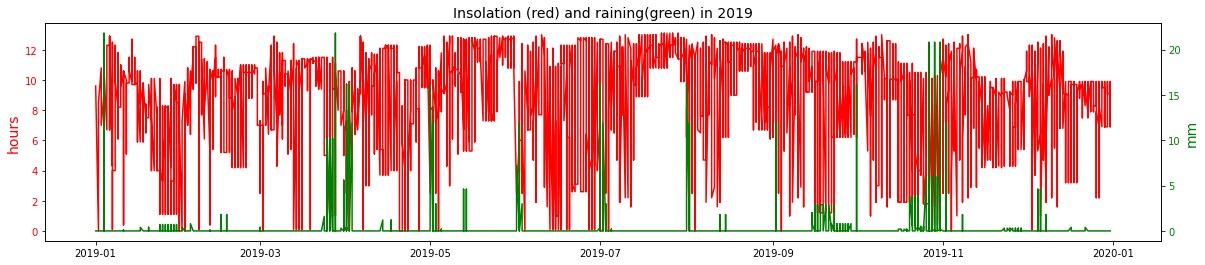

In [44]:
# Lets zoom the time series and use a different axis scale for each feature and display raining and insolation together
df_test = df_top.reset_index() 
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(df_test['I_STARTDATE'], df_test['sol'], color='red',label='sun')
ax.set_ylabel("SOL",color="red",fontsize=14)
ax.tick_params(axis='y', labelcolor='red')
ax.set_title('Insolation (red) and raining(green) in 2019', fontsize=14)
ax.set_ylabel("hours")
ax2 = ax.twinx()
ax2.plot(df_test['I_STARTDATE'], df_test['prec'], color='green')
ax2.set_ylabel("PREC",color="green",fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylabel("mm")

plt.show()

In both graphs we can see that the sun is almost permanent every day of the year.

 **METEO: ATM. PRES.**

<AxesSubplot:xlabel='I_STARTDATE'>

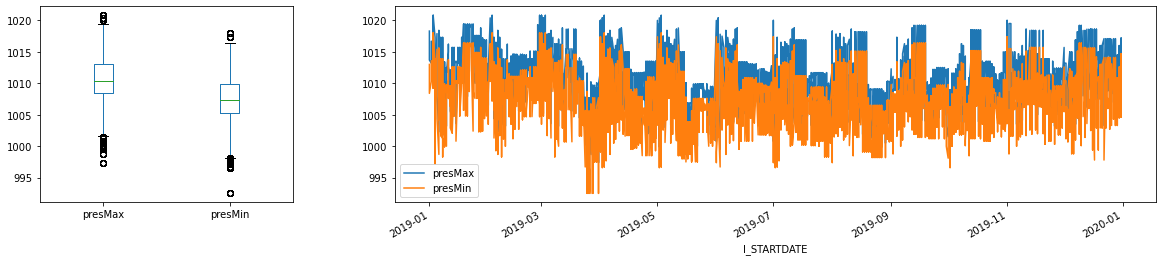

In [45]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,4),gridspec_kw={'width_ratios': [1, 3]})
df_top[['presMax','presMin']].plot.box(ax = axes[0])
df_top.plot.line(x='I_STARTDATE',y=['presMax','presMin'],ax = axes[1])

In [46]:
df_top[['presMin', 'presMax']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
presMin,13891.0,1007.395813,3.844222,992.500000,1005.200012,1007.299988,1009.900024,1018.000000
presMax,13891.0,1010.548645,3.834014,997.400024,1008.400024,1010.299988,1013.000000,1020.799988


The average reading we have is 1007.39 mb of **presMin** and 1010.53 mb of **presMax**, which means that, being less than 1009.14 mb, the time is mostly constant throughout the year in Tenerife.

# Correlation matrix

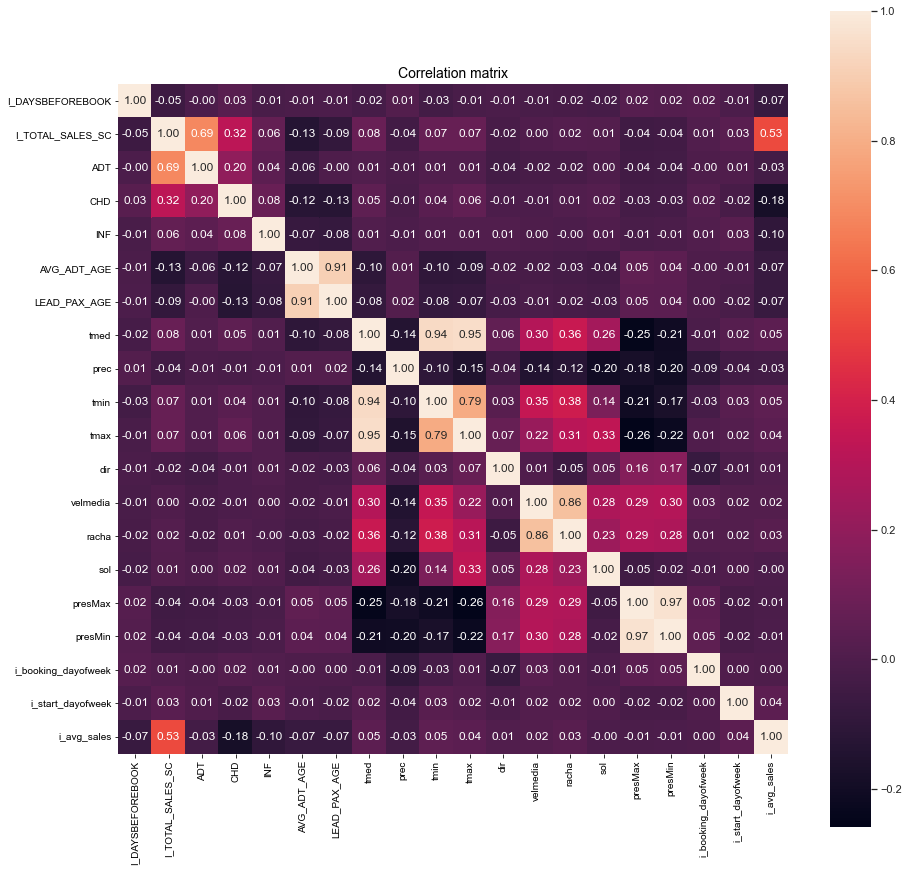

In [47]:
cm = df_top.corr()
f, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Correlation matrix', fontsize=14)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f')
plt.show()

The correlation matrix helps us to verify what we have seen throughout the EDA.  The correlations between the different features help us make decisions for our modelling dataset.
Decisions for the new dataset:

- We remove excursions that have more than 6 individuals in the set as we will consider them *Groups*.
- We keep the excursions with a positive sales amount.
- We keep the features **LEAD_PAX_AGE**, **tmax**, **presMax**, **presMax** and **velmedia** due to the existing correlation.
- In **LEAD_PAX_AGE** we select the values that are between 18 and 75. It has also a very high correlation with **AVG_ADT_AGE**, therefore we will ignore this last one for modelling too.
- We will use only the **i_avg_sales** (excluding total_sales), It has also lower correlations with the number of paxes.
- **tmax**, **tmin** and **tmin** are very correlated. We will use only one of the features for modelling.
- **Atmospheric preasures** are also very correlated and we will use only one of the 2 for modelling.

In [48]:
# Let's apply some of the decisions made above.

df_top2 =  df_top.query('ADT < 6')
df_top2 =  df_top2.query('I_TOTAL_SALES_SC > 0')
df_top2.drop('AVG_ADT_AGE',axis=1,inplace=True)
df_top2 =  df_top2.query('LEAD_PAX_AGE < 75 and LEAD_PAX_AGE > 18')
df_top2.drop(['tmin','tmed'],axis=1,inplace=True)
df_top2.drop(['racha'],axis=1,inplace=True)
df_top2.drop(['presMin'],axis=1,inplace=True)
df_top2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12886 entries, 238 to 25396
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   I_BOOKINGDATE        12886 non-null  datetime64[ns]
 1   I_STARTDATE          12886 non-null  datetime64[ns]
 2   I_DAYSBEFOREBOOK     12886 non-null  int64         
 3   STOCK_CODE           12886 non-null  object        
 4   STOCK_NAME           12886 non-null  object        
 5   I_TOTAL_SALES_SC     12886 non-null  int64         
 6   SOURCE_COUNTRY_CODE  12886 non-null  object        
 7   ADT                  12886 non-null  int64         
 8   CHD                  12886 non-null  int64         
 9   INF                  12886 non-null  int64         
 10  LEAD_PAX_AGE         12886 non-null  float32       
 11  prec                 12886 non-null  float32       
 12  tmax                 12886 non-null  float32       
 13  dir                  12886 no

In [49]:
df_top2.head(5)

,I_BOOKINGDATE,I_STARTDATE,I_DAYSBEFOREBOOK,STOCK_CODE,STOCK_NAME,I_TOTAL_SALES_SC,SOURCE_COUNTRY_CODE,ADT,CHD,INF,LEAD_PAX_AGE,prec,tmax,dir,velmedia,sol,presMax,i_booking_dayofweek,i_start_dayofweek,i_avg_sales
238,2018-12-29,2019-01-01,3,XESTCIB26W,San Miguel Castle,86,FI,1,1,0,48.794693,0.0,23.299999,3.0,4.4,9.6,1018.299988,5,1,43.0
615,2019-01-01,2019-01-01,0,PESTCI4HYS,Gomera Safari Tour,184,NL,2,0,0,48.794693,0.0,23.299999,3.0,4.4,9.6,1018.299988,1,1,92.0
617,2019-01-01,2019-01-01,0,XESTCIB4FU,Teide National Park,52,NL,2,0,0,48.794693,0.0,22.600000,3.0,4.4,9.6,1013.700012,1,1,26.0
1550,2019-01-31,2019-01-02,1,XESTCIBCSG,Teide Masca (Grand Tour),72,GB,2,0,0,48.794693,0.0,19.299999,99.0,3.3,0.0,1013.200012,3,2,36.0
1474,2019-01-29,2019-01-02,2,PESTCI4FXQ,Mts. Inselrundfahrt - Tour de Ile,108,LU,2,0,0,48.794693,0.0,21.700001,8.0,8.1,8.5,1016.700012,1,2,54.0


In [50]:
df_top2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
I_DAYSBEFOREBOOK,12886.0,4.180428,16.539126,-1.000000,1.000000,2.000000,4.000000,443.000000
I_TOTAL_SALES_SC,12886.0,109.107248,54.660423,9.000000,72.000000,103.000000,134.000000,550.000000
ADT,12886.0,2.159863,0.691805,1.000000,2.000000,2.000000,2.000000,5.000000
CHD,12886.0,0.263852,0.604658,0.000000,0.000000,0.000000,0.000000,6.000000
INF,12886.0,0.023747,0.171445,0.000000,0.000000,0.000000,0.000000,5.000000
LEAD_PAX_AGE,12886.0,48.167332,11.508679,19.000000,46.000000,48.794693,53.000000,74.000000
prec,12886.0,0.172769,1.328752,0.000000,0.000000,0.000000,0.000000,21.799999
tmax,12886.0,25.611067,3.026199,17.799999,23.299999,25.600000,27.799999,36.400002
dir,12886.0,40.246391,43.040276,1.000000,7.000000,9.000000,99.000000,99.000000
velmedia,12886.0,6.171712,2.364463,1.100000,4.200000,6.400000,7.800000,14.400000


# Split data

- We create a **df_prod** for the validation of the models (30%). <u>This data set will never be used in any training or testing stage while modelling</u>.
- With the rest of the data, we will test and train the different models, so we will divide it into train and test.

In [51]:
from sklearn.model_selection import train_test_split
test_size = 0.3
X_train, X_test, y_train, y_test=train_test_split(df_top2, 
                                                  df_top2['STOCK_CODE'], 
                                                  test_size=test_size, 
                                                  random_state=1)

In [52]:
df_prod = X_test 
print(f"Validation dataset shape: {df_prod.shape}")
df_prod

Validation dataset shape: (3866, 20)


,I_BOOKINGDATE,I_STARTDATE,I_DAYSBEFOREBOOK,STOCK_CODE,STOCK_NAME,I_TOTAL_SALES_SC,SOURCE_COUNTRY_CODE,ADT,CHD,INF,LEAD_PAX_AGE,prec,tmax,dir,velmedia,sol,presMax,i_booking_dayofweek,i_start_dayofweek,i_avg_sales
13493,2019-01-08,2019-02-08,1,XESTCIBO3U,Loro Express Exclusive,206,GB,4,0,0,49.000000,0.0,23.299999,99.0,6.4,7.7,1015.400024,1,4,51.5
12656,2019-07-26,2019-01-08,6,PESTCI4HYM,Jeep Safari Teide Masca Sur,108,LU,2,0,0,51.000000,0.0,29.200001,6.0,9.2,12.3,1009.500000,4,1,54.0
13627,2019-02-08,2019-06-08,4,XESTCIB4FU,Teide National Park,92,GB,3,1,0,57.000000,0.0,19.100000,6.0,4.4,12.9,1010.700012,4,5,23.0
8566,2019-12-06,2019-06-14,2,PESTCI4FXQ,Mts. Inselrundfahrt - Tour de Ile,108,GB,2,0,0,37.000000,0.0,24.100000,6.0,3.9,7.3,1011.599976,4,4,54.0
2785,2019-02-25,2019-11-03,14,XESTCIBSBI,Mts. Teide South,50,FI,2,0,0,48.794693,0.0,31.100000,99.0,11.4,10.2,1008.900024,0,6,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24746,2019-12-16,2019-12-18,2,XESTCIBPNI,Freebird (3H Vip Exclusive),118,GB,2,0,0,74.000000,0.0,23.600000,12.0,4.7,9.4,1008.299988,0,2,59.0
22586,2019-05-11,2019-11-23,18,XESTCIBSBI,Mts. Teide South,39,FI,1,1,0,48.794693,0.0,24.700001,1.0,3.3,8.0,1009.799988,5,5,19.5
20414,2019-10-10,2019-10-14,4,XESTCIBCTW,Music Hall Tavern,98,GB,2,0,0,57.000000,0.0,26.900000,99.0,6.1,8.7,1009.000000,3,0,49.0
25069,2019-12-22,2019-12-27,5,PESTCI4FXQ,Mts. Inselrundfahrt - Tour de Ile,108,GB,2,0,0,48.794693,0.0,25.100000,99.0,5.8,7.9,1017.000000,6,4,54.0


In [53]:
df_prod.to_csv(DATA_PATH+'df_prod.csv')

In [54]:
df_train_and_test=X_train
df_train_and_test

,I_BOOKINGDATE,I_STARTDATE,I_DAYSBEFOREBOOK,STOCK_CODE,STOCK_NAME,I_TOTAL_SALES_SC,SOURCE_COUNTRY_CODE,ADT,CHD,INF,LEAD_PAX_AGE,prec,tmax,dir,velmedia,sol,presMax,i_booking_dayofweek,i_start_dayofweek,i_avg_sales
684,2019-10-01,2019-12-01,2,XESTCIBCSG,Teide Masca (Grand Tour),72,GB,2,0,0,41.000000,0.0,31.700001,7.0,7.5,11.0,1009.099976,1,6,36.000000
21611,2019-10-16,2019-10-16,0,XESTCIBCSG,Teide Masca (Grand Tour),72,GB,2,0,0,48.794693,0.2,24.900000,7.0,7.2,1.9,1013.299988,2,2,36.000000
11102,2019-10-07,2019-07-14,4,XESTCIBPNI,Freebird (3H Vip Exclusive),123,GB,2,1,0,44.000000,0.0,27.100000,99.0,6.9,10.8,1009.500000,0,6,41.000000
23066,2019-11-14,2019-11-16,2,PESTCI4HYS,Gomera Safari Tour,285,LU,3,0,0,67.000000,0.0,25.500000,99.0,9.2,4.8,1009.500000,3,5,95.000000
4265,2019-03-18,2019-03-21,3,XESTCIBCTW,Music Hall Tavern,78,GB,2,0,0,64.000000,0.0,22.900000,7.0,8.9,11.3,1012.700012,0,3,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8250,2019-09-06,2019-11-06,2,PESTCI4IJM,Twin Tickets,132,GB,2,0,0,38.000000,0.0,28.000000,21.0,4.7,1.0,1003.500000,4,2,66.000000
4785,2019-03-31,2019-02-04,2,PESTCI4FN8,Submarino Safari,218,FI,3,2,0,65.000000,0.0,22.600000,1.0,3.6,6.4,1009.900024,6,0,43.599998
9431,2019-06-23,2019-06-24,0,PESTCI4HYM,Jeep Safari Teide Masca Sur,108,GB,2,0,0,61.000000,0.0,28.100000,22.0,5.0,12.8,1009.700012,6,0,54.000000
10800,2019-08-07,2019-12-07,4,XESTCIBCSG,Teide Masca (Grand Tour),72,GB,2,0,0,48.794693,0.0,28.000000,99.0,7.2,12.4,1008.400024,2,5,36.000000


In [55]:
df_train_and_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 684 to 17136
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   I_BOOKINGDATE        9020 non-null   datetime64[ns]
 1   I_STARTDATE          9020 non-null   datetime64[ns]
 2   I_DAYSBEFOREBOOK     9020 non-null   int64         
 3   STOCK_CODE           9020 non-null   object        
 4   STOCK_NAME           9020 non-null   object        
 5   I_TOTAL_SALES_SC     9020 non-null   int64         
 6   SOURCE_COUNTRY_CODE  9020 non-null   object        
 7   ADT                  9020 non-null   int64         
 8   CHD                  9020 non-null   int64         
 9   INF                  9020 non-null   int64         
 10  LEAD_PAX_AGE         9020 non-null   float32       
 11  prec                 9020 non-null   float32       
 12  tmax                 9020 non-null   float32       
 13  dir                  9020 non-

In [56]:
df_train_and_test.to_csv(DATA_PATH+'df_train_and_test.csv')